<a href="https://colab.research.google.com/github/lisosoma/BI-statistics/blob/main/bi_hw2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts
import scipy
import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import fmin
import seaborn as sns
#from _bootstrap import bootstrap

### Задача 1.

In [ ]:
n = [10, 100, 1000]

- (a) Доверительные интервалы для среднего.

In [ ]:
for k in n:
    sample = sts.norm.rvs(loc=0, scale=1, size=k)
    print(f'Размер выборки равен {k}')
    print(f'Интервал, полученный с помощью бутстрэпа : {sts.bootstrap((sample,), np.mean, confidence_level=0.95).confidence_interval}')
    print(f'Аналитический интервал {np.mean(sample) - sts.norm.ppf(q = 0.975) / np.sqrt(k), np.mean(sample) + sts.norm.ppf(q = 0.975) / np.sqrt(k)}\n')

Размер выборки равен 10
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=-0.6880223727833092, high=0.2050679848633788)
Аналитический интервал (-0.7825071112115098, 0.45708295339761335)

Размер выборки равен 100
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=-0.1982753324755863, high=0.16444501685529342)
Аналитический интервал (-0.21283365471286408, 0.17915914219514673)

Размер выборки равен 1000
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=-0.08462445101559916, high=0.03888320607454476)
Аналитический интервал (-0.08429729646872676, 0.03966170999218556)



- (b) Доверительный интервал для корня из дисперсии.

In [ ]:
for k in n:
    sample = sts.norm.rvs(loc=0, scale=1, size=k)
    print(f'Размер выборки равен {k}')
    print(f'Интервал, полученный с помощью бутстрэпа : {sts.bootstrap((sample,), np.std, confidence_level=0.95).confidence_interval}')
    print(f'Аналитический интервал {np.var(sample) * (k - 1) / sts.chi2.ppf(q = 0.975, df = k - 1) , np.var(sample) * (k - 1) / sts.chi2.ppf(q = 0.025, df = k -1)}\n')

Размер выборки равен 10
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=0.5982304315969376, high=1.3533842135375476)
Аналитический интервал (0.4053318766132175, 2.8553414869436353)

Размер выборки равен 100
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=0.8348004759591303, high=1.0793784081983246)
Аналитический интервал (0.6810347820776933, 1.192183114288893)

Размер выборки равен 1000
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=0.9879614525976583, high=1.076409757875072)
Аналитический интервал (0.9740303047733875, 1.1608652484668267)



 - (с) Доверительный интервал для параметра экспоненциального распределения.
 
 Так как $\bar X \sim \mathcal{N}(\frac{1}{\lambda},\frac{1}{n\lambda^2})$, то  доверительный интервал (аналитический) будет следующим: $\bar X ± Z_{1-\frac{\alpha}{2}} \sqrt\frac{\bar X^2}{n}$.

In [ ]:
for k in n:
    sample = sts.expon.rvs(loc=10, size=k)
    print(f'Размер выборки равен {k}')
    print(f'Интервал, полученный с помощью бутстрэпа : {sts.bootstrap((sample,), np.mean, confidence_level=0.95).confidence_interval}')
    print(f'Аналитический интервал {np.mean(sample) - sts.norm.ppf(q = 0.975) / np.sqrt(k) * np.sqrt(np.mean(sample)), np.mean(sample) + sts.norm.ppf(q = 0.975) / np.sqrt(k) * np.sqrt(np.mean(sample))}\n')

Размер выборки равен 10
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=10.510985433775216, high=11.27289029344187)
Аналитический интервал (8.770708354460977, 12.84599146609837)

Размер выборки равен 100
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=10.824672309313057, high=11.169857286135636)
Аналитический интервал (10.324298626284673, 11.622828447954003)

Размер выборки равен 1000
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=10.90298711368964, high=11.02683416503986)
Аналитический интервал (10.75618818381875, 11.166591535478624)



- (d) Доверительный интервал для параметра $p$ в распределении Бернулли.

In [ ]:
for k in n:
    sample = sts.bernoulli.rvs(p=0.5, loc = 0, size=k)
    print(f'Размер выборки равен {k}')
    print(f'Интервал, полученный с помощью бутстрэпа : {sts.bootstrap((sample,), np.mean, confidence_level=0.95).confidence_interval}')
    print(f'Аналитический интервал {np.mean(sample) - sts.norm.ppf(q = 0.975) / np.sqrt(k) * np.sqrt(np.mean(sample) * (1 - np.mean(sample))), np.mean(sample) + sts.norm.ppf(q = 0.975) / np.sqrt(k) * np.sqrt(np.mean(sample) * (1 - np.mean(sample)))}\n')

Размер выборки равен 10
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=0.1, high=0.7)
Аналитический интервал (0.19010248384771922, 0.8098975161522808)

Размер выборки равен 100
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=0.39, high=0.59)
Аналитический интервал (0.4020018007729973, 0.5979981992270027)

Размер выборки равен 1000
Интервал, полученный с помощью бутстрэпа : ConfidenceInterval(low=0.502, high=0.563)
Аналитический интервал (0.5030819797079954, 0.5649180202920047)



### Задача 2.

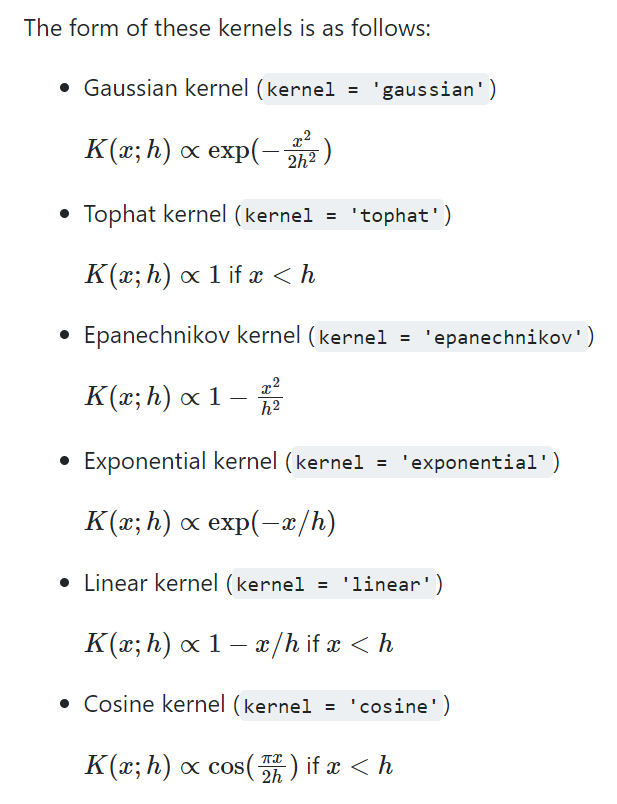

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
def confidenceInterval(bootstrap, estimate = 'mean'):
    if estimate == 'mean':
        xbar = np.mean(bootstrap)
        samples = np.mean(bootstrap, axis = 0)
    elif estimate == 1:
        xbar = 1 / np.mean(bootstrap)
        samples = 1 / np.mean(bootstrap, axis = 0)
    else:
        samples = np.std(bootstrap, axis = 0)
        xbar = np.mean(samples)

    upper = xbar - np.quantile((samples - xbar) / np.std(bootstrap), 0.025)
    lower = xbar - np.quantile((samples - xbar) / np.std(bootstrap), 0.975)

    return (lower, upper)

- (a) Доверительные интервалы для среднего.

In [ ]:
for k in n:
    sample = sts.norm.rvs(loc=0, scale=1, size=k)

    gaussian= KernelDensity(kernel='gaussian').fit([sample])
    tophat = KernelDensity(kernel = 'tophat').fit([sample])

    bootstrapGaussian = gaussian.sample(n_samples = 1000)
    bootstrapTophat = tophat.sample(n_samples = 1000)

    print(f'Размер выборки равен {k}')
    print(f'Интервал, полученный с помощью бутстрэпа с ядром gaussian: {confidenceInterval(bootstrapGaussian)}')
    print(f'Интервал, полученный с помощью бутстрэпа с ядром tophat: {confidenceInterval(bootstrapTophat)}\n')

Размер выборки равен 10
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (-1.0448984368149128, 0.7026376693755626)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (-1.469285677409155, 1.0005725669902554)

Размер выборки равен 100
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (-1.163510646931192, 1.3077224549011386)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (-1.7232297837446662, 1.9808934397399134)

Размер выборки равен 1000
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (-1.4882189049168644, 1.3038452007153782)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (-2.110302685411039, 1.8698853321835964)



- Доверительный интервал для стандартного отклоенения.

In [ ]:
k = 10
sample = sts.norm.rvs(loc=0, scale=1, size=k)

gaussian= KernelDensity(kernel='gaussian').fit([sample])
tophat = KernelDensity(kernel = 'tophat', bandwidth = 3.5).fit([sample])

bootstrapGaussian = gaussian.sample(n_samples = 1000)
bootstrapTophat = tophat.sample(n_samples = 1000)

print(f'Размер выборки равен {k}')
print(f'Интервал, полученный с помощью бутстрэпа с ядром gaussian: {confidenceInterval(bootstrapGaussian, 0)}')
print(f'Интервал, полученный с помощью бутстрэпа с ядром tophat: {confidenceInterval(bootstrapTophat, 0)}\n')

k = 100
sample = sts.norm.rvs(loc=0, scale=1, size=k)

gaussian= KernelDensity(kernel='gaussian').fit([sample])
tophat = KernelDensity(kernel = 'tophat', bandwidth = 10).fit([sample])

bootstrapGaussian = gaussian.sample(n_samples = 1000)
bootstrapTophat = tophat.sample(n_samples = 1000)

print(f'Размер выборки равен {k}')
print(f'Интервал, полученный с помощью бутстрэпа с ядром gaussian: {confidenceInterval(bootstrapGaussian, 0)}')
print(f'Интервал, полученный с помощью бутстрэпа с ядром tophat: {confidenceInterval(bootstrapTophat, 0)}\n')

k = 1000
sample = sts.norm.rvs(loc=0, scale=1, size=k)

gaussian= KernelDensity(kernel='gaussian').fit([sample])
tophat = KernelDensity(kernel = 'tophat', bandwidth = 35).fit([sample])

bootstrapGaussian = gaussian.sample(n_samples = 1000)
bootstrapTophat = tophat.sample(n_samples = 1000)

print(f'Размер выборки равен {k}')
print(f'Интервал, полученный с помощью бутстрэпа с ядром gaussian: {confidenceInterval(bootstrapGaussian, 0)}')
print(f'Интервал, полученный с помощью бутстрэпа с ядром tophat: {confidenceInterval(bootstrapTophat, 0)}\n')

Размер выборки равен 10
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (0.9787326498769104, 1.0117735975434317)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (0.9948131362596244, 1.018531804350114)

Размер выборки равен 100
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (0.9625234042533743, 1.0303263860642329)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (0.959088427091473, 1.020743124442342)

Размер выборки равен 1000
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (0.9662551677645165, 1.0305237959680944)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (1.0738091484055272, 1.1373009786942263)



 - (с) Доверительный интервал для параметра экспоненциального распределения.

In [ ]:
for k in n:
    sample = sts.expon.rvs(loc=10, size=k)

    gaussian= KernelDensity(kernel='gaussian').fit([sample])
    tophat = KernelDensity(kernel = 'tophat').fit([sample])

    bootstrapGaussian = gaussian.sample(n_samples = 1000)
    bootstrapTophat = tophat.sample(n_samples = 1000)

    print(f'Размер выборки равен {k}')
    print(f'Интервал, полученный с помощью бутстрэпа с ядром gaussian: {confidenceInterval(bootstrapGaussian)}')
    print(f'Интервал, полученный с помощью бутстрэпа с ядром tophat: {confidenceInterval(bootstrapTophat)}\n')

Размер выборки равен 10
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (9.763079357725223, 12.046107691738712)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (9.42598311422795, 12.196463590288575)

Размер выборки равен 100
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (9.52530152060676, 11.527254298041195)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (8.862568261432704, 11.862373658802408)

Размер выборки равен 1000
Интервал, полученный с помощью бутстрэпа с ядром gaussian: (9.00592383105401, 11.67026121810683)
Интервал, полученный с помощью бутстрэпа с ядром tophat: (8.119760645390866, 11.964269224258679)

